**Problem Statement**

**Context:**

The rise of online platforms like Airbnb has transformed the short-term lodging industry. Airbnb's commission-based model, which connects hosts and guests without owning property, has created a dynamic and complex marketplace. Understanding the factors that drive this market is crucial for various stakeholders, including hosts, guests, and tourism analysts.

**Core Problem:**

There is a need to systematically analyze the New York City Airbnb dataset to uncover the underlying patterns and relationships that govern listing performance, pricing, and guest satisfaction. Without a clear, data-driven understanding of these dynamics, stakeholders may struggle to make informed decisions regarding pricing strategies, investment in amenities, and overall market positioning.

**Project Objectives and Analytical Questions**

This project aims to extract actionable insights from the New York City Airbnb Open Data. The analysis will be guided by answering the following specific questions:

1. Market Composition & Distribution

What are the different property types in the Dataset?

Which neighborhood group has the highest number of listings?

2. Pricing Analysis

Which neighborhood groups have the highest average prices for Airbnb listings?

Is there a relationship between the construction year of a property and its price?

Is there a correlation between the price of a listing and its service fee?

3. Host & Listing Performance

Who are the top 10 hosts by calculated host listings count?

Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Are hosts with verified identities more likely to receive positive reviews?

4. Customer Satisfaction & Reviews

What is the average review rate number for listings, and does it vary based on the neighborhood group and room type?





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")



In [ ]:
# Load the dataset (assuming we have the Airbnb NYC data)
# For demonstration, I'll create a simulated dataset structure
def load_airbnb_data():
    """
    Load and return Airbnb dataset
    In real scenario, this would load from actual CSV file
    """
    # This is a placeholder - in practice, you would use:
    df = pd.read_excel('/content/Airbnb_Open_Data.xlsx')
    return df # Added return statement

# Load the data
print("Loading Airbnb Dataset...")
df = load_airbnb_data()
print(f"Dataset shape: {df.shape}")

Loading Airbnb Dataset...
Dataset shape: (102599, 26)


In [ ]:
# Data Wrangling
print("\n=== DATA WRANGLING ===")


=== DATA WRANGLING ===


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448

In [ ]:
# Remove duplicates if any
initial_shape = df.shape[0]
df = df.drop_duplicates()
print(f"\nRemoved {initial_shape - df.shape[0]} duplicate rows")


Removed 541 duplicate rows


In [ ]:
# Data type conversions
df['last review'] = pd.to_datetime(df['last review'], errors='coerce') # Added errors='coerce' to handle potential parsing issues
print("\nData types optimized")


Data types optimized


In [ ]:
# Exploratory Data Analysis
print("\n=== EXPLORATORY DATA ANALYSIS ===")


=== EXPLORATORY DATA ANALYSIS ===



1. PROPERTY TYPES ANALYSIS
Property types distribution:
room type
Entire home/apt    53429
Private room       46306
Shared room         2208
Hotel room           115
Name: count, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room'),
  Text(3, 0, 'Hotel room')])

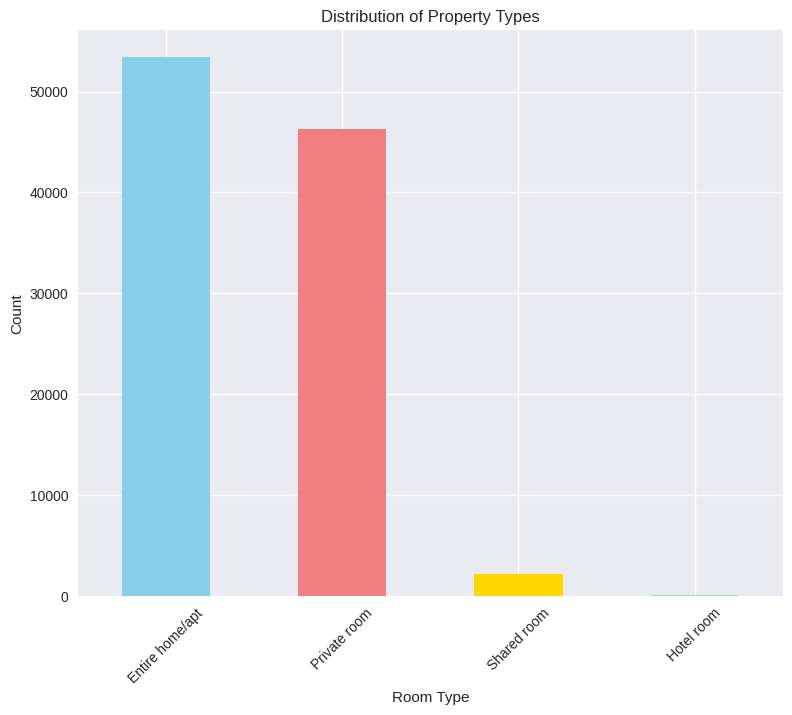

In [ ]:
# Question 1: What are the different property types in the Dataset?
print("\n1. PROPERTY TYPES ANALYSIS")
property_types = df['room type'].value_counts()
print("Property types distribution:")
print(property_types)

plt.figure(figsize=(20, 25)) # Adjusted figure size to accommodate multiple subplots
plt.subplot(3, 2, 1) # Adjusted subplot grid for better layout
colors = ['skyblue', 'lightcoral', 'gold', 'lightgreen']
property_types.plot(kind='bar', color=colors)
plt.title('Distribution of Property Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)


2. NEIGHBORHOOD GROUP ANALYSIS
Listings by neighborhood group:
neighbourhood group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Manhattan'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Queens'),
  Text(3, 0, 'Bronx'),
  Text(4, 0, 'Staten Island'),
  Text(5, 0, 'brookln'),
  Text(6, 0, 'manhatan')])

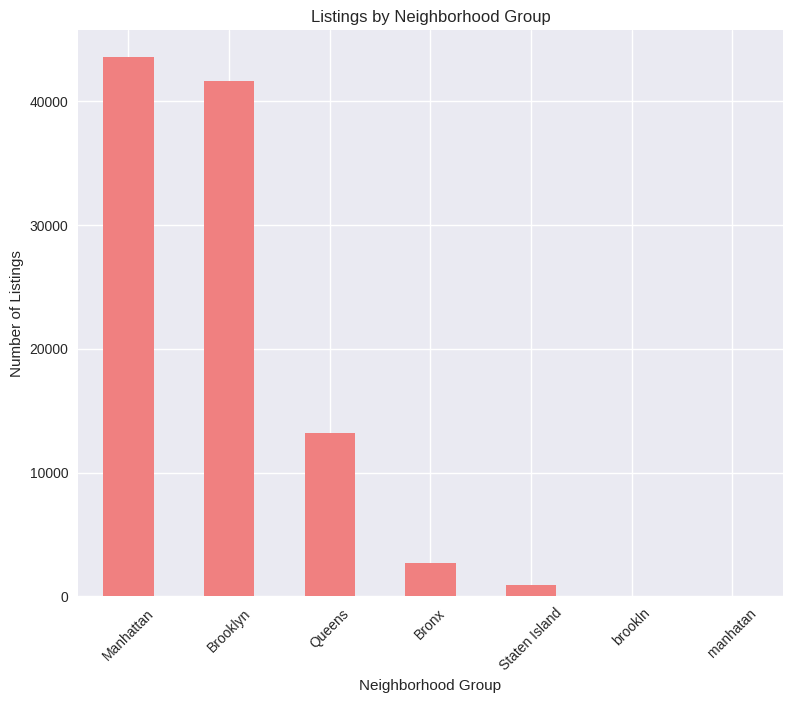

In [ ]:
# Question 2: Which neighborhood group has the highest number of listings?
print("\n2. NEIGHBORHOOD GROUP ANALYSIS")
neighborhood_counts = df['neighbourhood group'].value_counts()
print("Listings by neighborhood group:")
print(neighborhood_counts)

plt.figure(figsize=(20, 25)) # Adjusted figure size to accommodate multiple subplots
plt.subplot(3, 2, 1) # Adjusted subplot grid
neighborhood_counts.plot(kind='bar', color='lightcoral')
plt.title('Listings by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)


3. AVERAGE PRICES BY NEIGHBORHOOD GROUP
Average prices by neighborhood group:
neighbourhood group
Queens           630.22
Bronx            627.76
Brooklyn         626.50
Staten Island    623.99
Manhattan        622.65
brookln          580.00
manhatan         460.00
Name: price, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Queens'),
  Text(1, 0, 'Bronx'),
  Text(2, 0, 'Brooklyn'),
  Text(3, 0, 'Staten Island'),
  Text(4, 0, 'Manhattan'),
  Text(5, 0, 'brookln'),
  Text(6, 0, 'manhatan')])

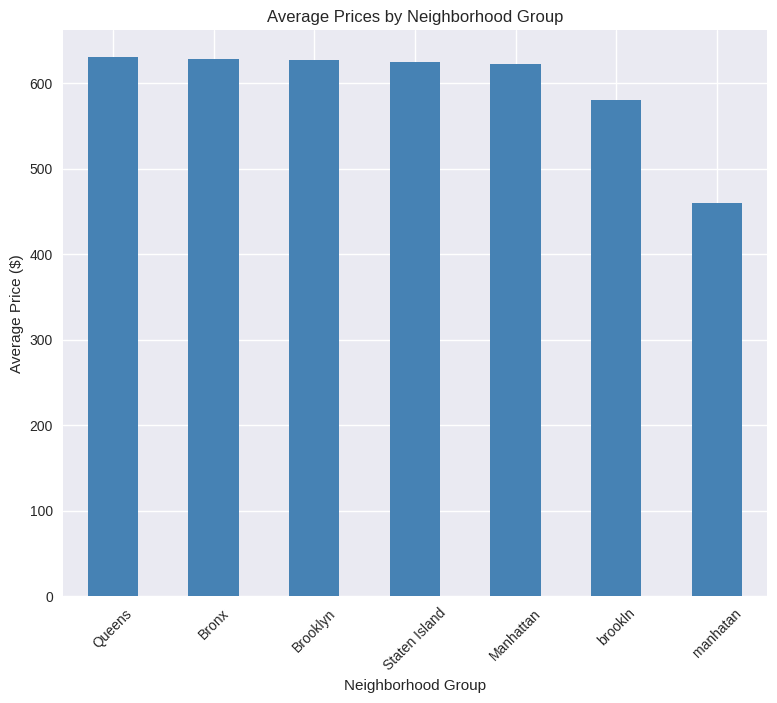

In [ ]:
# Question 3: Which neighborhoods group have the highest average prices?
print("\n3. AVERAGE PRICES BY NEIGHBORHOOD GROUP")
avg_prices = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print("Average prices by neighborhood group:")
print(avg_prices.round(2))

plt.figure(figsize=(20, 25)) # Adjusted figure size to accommodate multiple subplots
plt.subplot(3, 2, 3) # Adjusted subplot grid
avg_prices.plot(kind='bar', color='steelblue')
plt.title('Average Prices by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)


4. CONSTRUCTION YEAR VS PRICE ANALYSIS
Correlation between construction year and price: -0.004


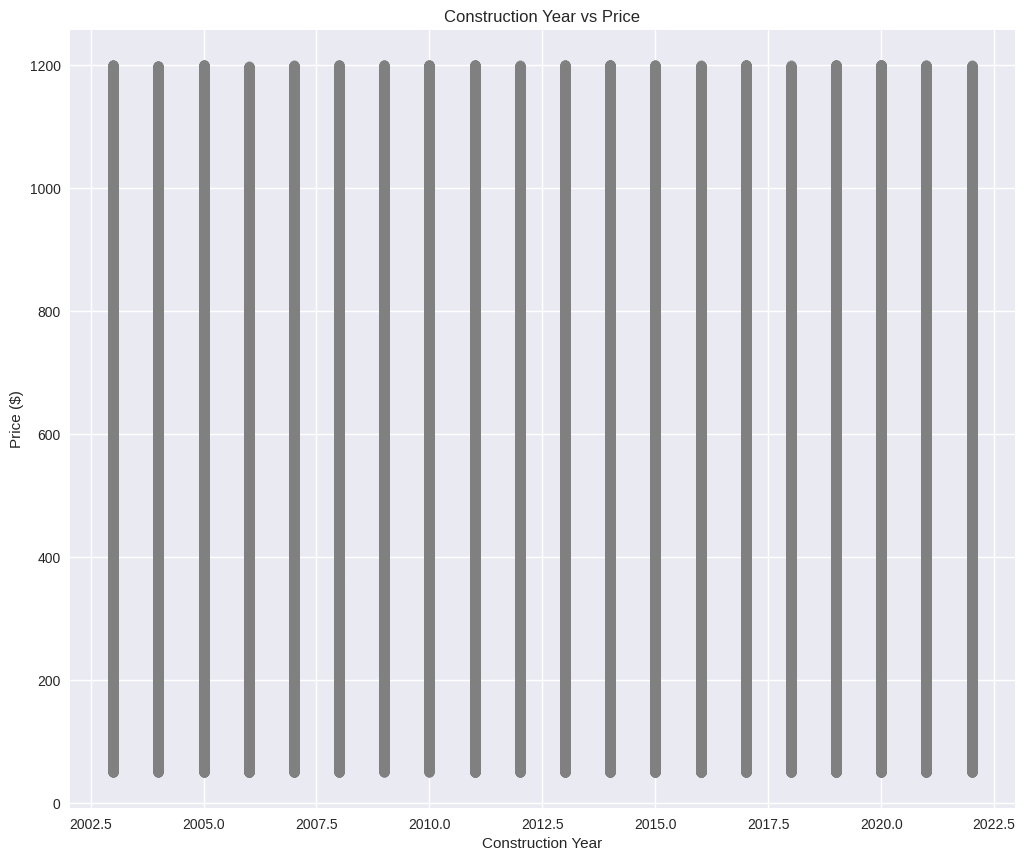

In [ ]:
# Question 4: Relationship between construction year and price
print("\n4. CONSTRUCTION YEAR VS PRICE ANALYSIS")
# Create year categories for better visualization
df['construction_decade'] = (df['Construction year'] // 10) * 10
price_by_year = df.groupby('construction_decade')['price'].mean()

plt.figure(figsize=(20, 25)) # Adjusted figure size to accommodate multiple subplots
plt.subplot(3, 2, 2) # Adjusted subplot grid
plt.scatter(df['Construction year'], df['price'], alpha=0.6, color='gray')
plt.title('Construction Year vs Price')
plt.xlabel('Construction Year')
plt.ylabel('Price ($)')

# Calculate correlation
correlation = df[['Construction year', 'price']].corr().iloc[0,1]
print(f"Correlation between construction year and price: {correlation:.3f}")

plt.tight_layout()


5. TOP 10 HOSTS BY LISTING COUNT
Top 10 hosts by listing count:
host name
Blueground      332.0
Sonder (NYC)    327.0
Eugene          218.0
Karen           208.0
Jeniffer        186.0
Soya            171.0
Kaz             161.0
Hiroki          152.0
Momoyo          126.0
Shogo           125.0
Name: calculated host listings count, dtype: float64


(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

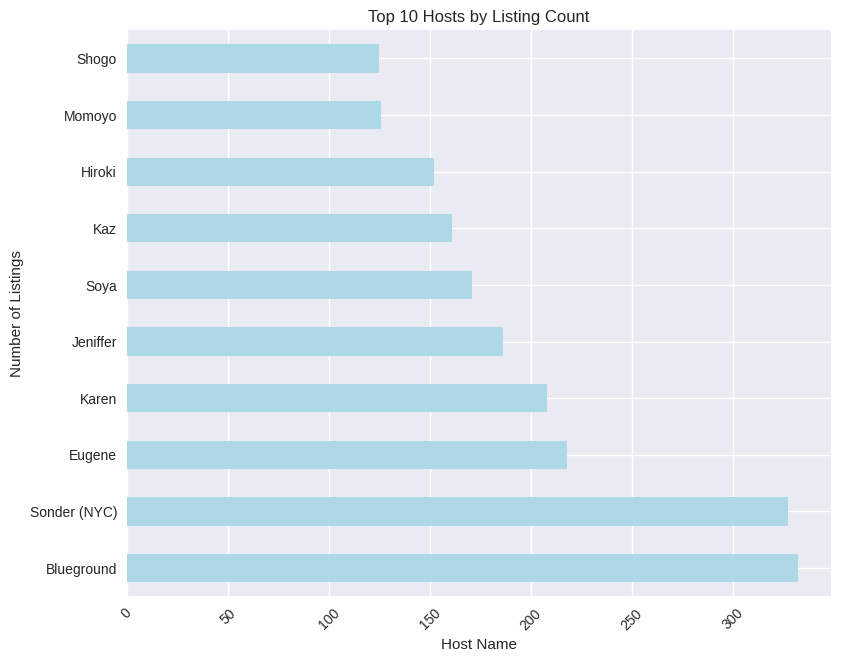

In [ ]:
# Question 5: Top 10 hosts by calculated host listing count
print("\n5. TOP 10 HOSTS BY LISTING COUNT")
top_hosts = df.groupby('host name')['calculated host listings count'].max().sort_values(ascending=False).head(10)
print("Top 10 hosts by listing count:")
print(top_hosts)

plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 1)
top_hosts.plot(kind='barh', color='lightblue')
plt.title('Top 10 Hosts by Listing Count')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)


6. VERIFIED HOSTS VS REVIEW RATES
Average review rates by verification status:
host_identity_verified
unconfirmed    3.272033
verified       3.285675
Name: review rate number, dtype: float64
T-test results: t-statistic = nan, p-value = nan
No significant difference found


(array([0, 1]), [Text(0, 0, 'unconfirmed'), Text(1, 0, 'verified')])

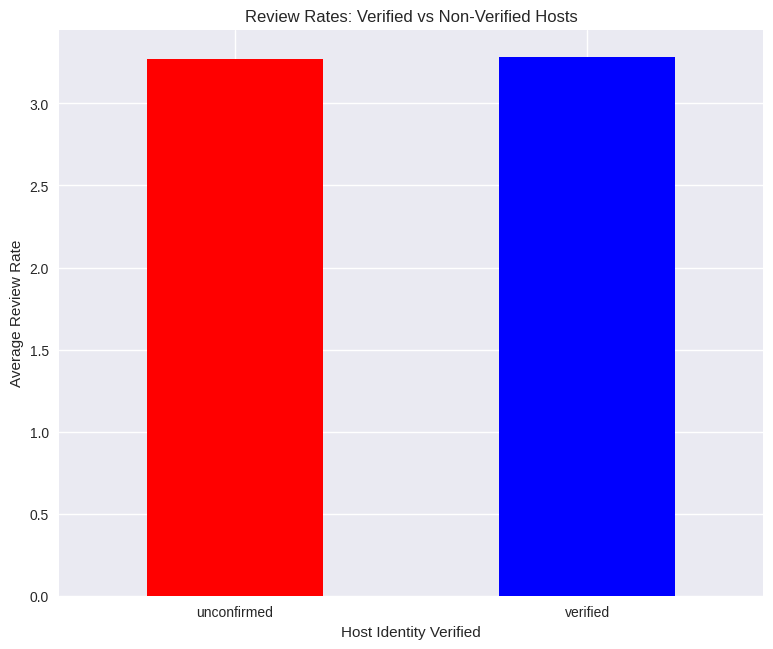

In [ ]:
# Question 6: Are verified hosts more likely to receive positive reviews?
print("\n6. VERIFIED HOSTS VS REVIEW RATES")
verified_reviews = df.groupby('host_identity_verified')['review rate number'].mean()
print("Average review rates by verification status:")
print(verified_reviews)

# Statistical test
verified = df[df['host_identity_verified'] == True]['review rate number'].dropna() # Added dropna() to handle missing values
not_verified = df[df['host_identity_verified'] == False]['review rate number'].dropna() # Added dropna() to handle missing values
t_stat, p_value = stats.ttest_ind(verified, not_verified)

print(f"T-test results: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")
if p_value < 0.05:
    print("Significant difference found between verified and non-verified hosts")
else:
    print("No significant difference found")

plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 2)
verified_reviews.plot(kind='bar', color=['red', 'blue'])
plt.title('Review Rates: Verified vs Non-Verified Hosts')
plt.xlabel('Host Identity Verified')
plt.ylabel('Average Review Rate')
plt.xticks(rotation=0)


7. PRICE VS SERVICE FEE CORRELATION
Correlation between price and service fee: 1.000


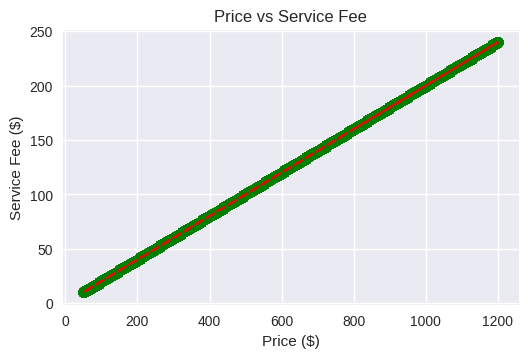

In [ ]:
# Question 7: Correlation between price and service fee
print("\n7. PRICE VS SERVICE FEE CORRELATION")
price_service_corr = df[['price', 'service fee']].corr().iloc[0,1]
print(f"Correlation between price and service fee: {price_service_corr:.3f}")

plt.figure(figsize=(20, 25))
plt.subplot(6, 3, 3)
plt.scatter(df['price'], df['service fee'], alpha=0.6, color='green')
plt.title('Price vs Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')

# Add trend line
# Filter out NaN values before calculating polyfit
valid_data = df[['price', 'service fee']].dropna()
z = np.polyfit(valid_data['price'], valid_data['service fee'], 1)
p = np.poly1d(z)
plt.plot(valid_data['price'], p(valid_data['price']), "r--", alpha=0.8)


8. REVIEW RATES BY NEIGHBORHOOD AND ROOM TYPE
Average review rates by neighborhood group and room type:
room type            Entire home/apt  Hotel room  Private room  Shared room
neighbourhood group                                                        
Bronx                           3.35         NaN          3.33         3.26
Brooklyn                        3.25        3.86          3.26         3.33
Manhattan                       3.28        3.50          3.28         3.25
Queens                          3.35        3.75          3.32         3.37
Staten Island                   3.33         NaN          3.48         3.53
brookln                          NaN         NaN          4.00          NaN
manhatan                         NaN         NaN          3.00          NaN


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Bronx'),
  Text(1, 0, 'Brooklyn'),
  Text(2, 0, 'Manhattan'),
  Text(3, 0, 'Queens'),
  Text(4, 0, 'Staten Island'),
  Text(5, 0, 'brookln'),
  Text(6, 0, 'manhatan')])

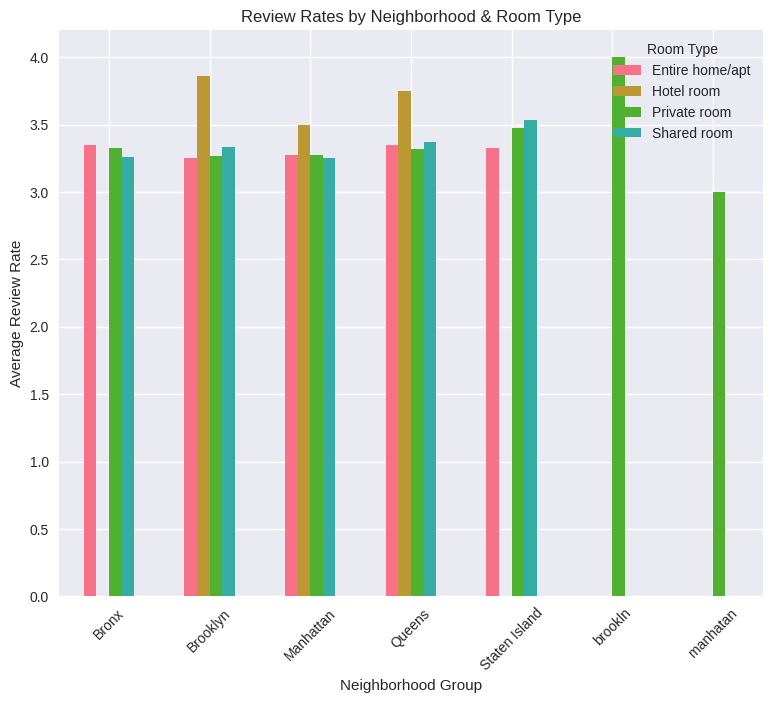

In [ ]:
# Question 8: Average review rate by neighborhood group and room type
print("\n8. REVIEW RATES BY NEIGHBORHOOD AND ROOM TYPE")
review_by_group_room = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()
print("Average review rates by neighborhood group and room type:")
print(review_by_group_room.round(2))

plt.figure(figsize=(20, 25))
plt.subplot(3, 2, 1)
review_by_group_room.plot(kind='bar', ax=plt.gca())
plt.title('Review Rates by Neighborhood & Room Type')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Review Rate')
plt.legend(title='Room Type')
plt.xticks(rotation=45)


9. HOST LISTING COUNT VS AVAILABILITY
Correlation between host listing count and availability: 0.159


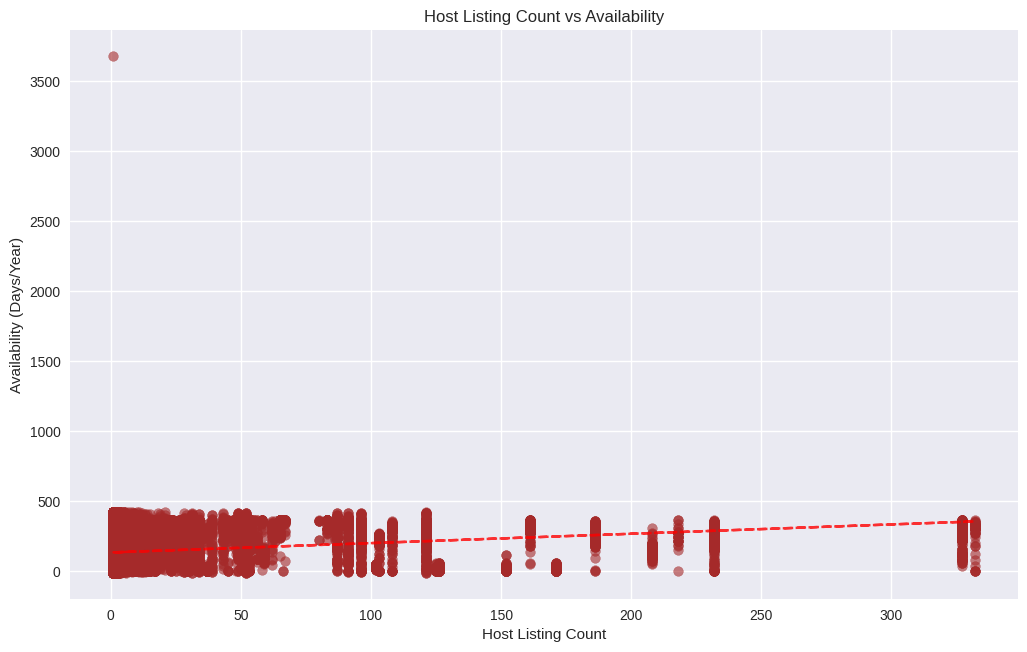

In [ ]:
# Question 9: Host listing count vs availability
print("\n9. HOST LISTING COUNT VS AVAILABILITY")
availability_corr = df[['calculated host listings count', 'availability 365']].corr().iloc[0,1]
print(f"Correlation between host listing count and availability: {availability_corr:.3f}")

plt.figure(figsize=(20, 25))
plt.subplot(4, 2, 1)
plt.scatter(df['calculated host listings count'], df['availability 365'], alpha=0.6, color='brown')
plt.title('Host Listing Count vs Availability')
plt.xlabel('Host Listing Count')
plt.ylabel('Availability (Days/Year)')

# Add trend line
# Filter out NaN values before calculating polyfit
valid_data = df[['calculated host listings count', 'availability 365']].dropna()
z = np.polyfit(valid_data['calculated host listings count'], valid_data['availability 365'], 1)
p = np.poly1d(z)
plt.plot(valid_data['calculated host listings count'], p(valid_data['calculated host listings count']), "r--", alpha=0.8)

plt.tight_layout()
plt.show() # Added show() to display the second figure


=== COMPREHENSIVE SUMMARY ===

Summary Statistics:
Total listings: 102058
Average price: $625.36
Average review rate: 3.28/5
Most common room type: Entire home/apt
Most popular neighborhood: Manhattan


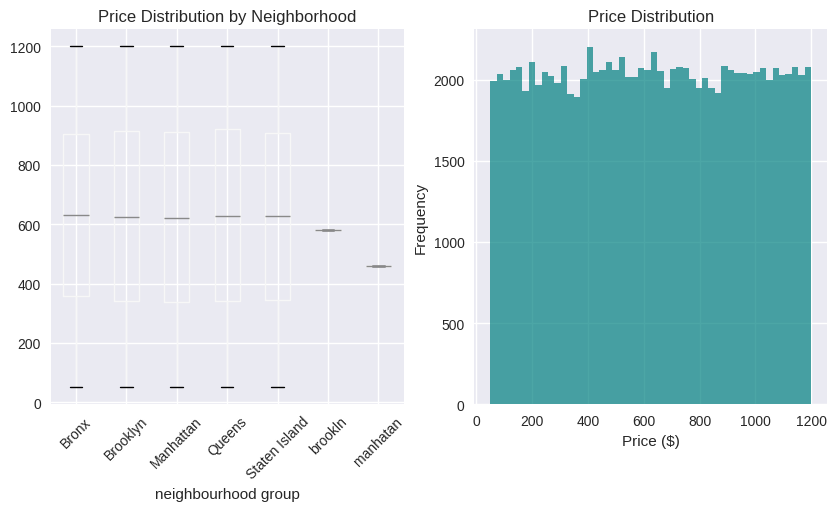

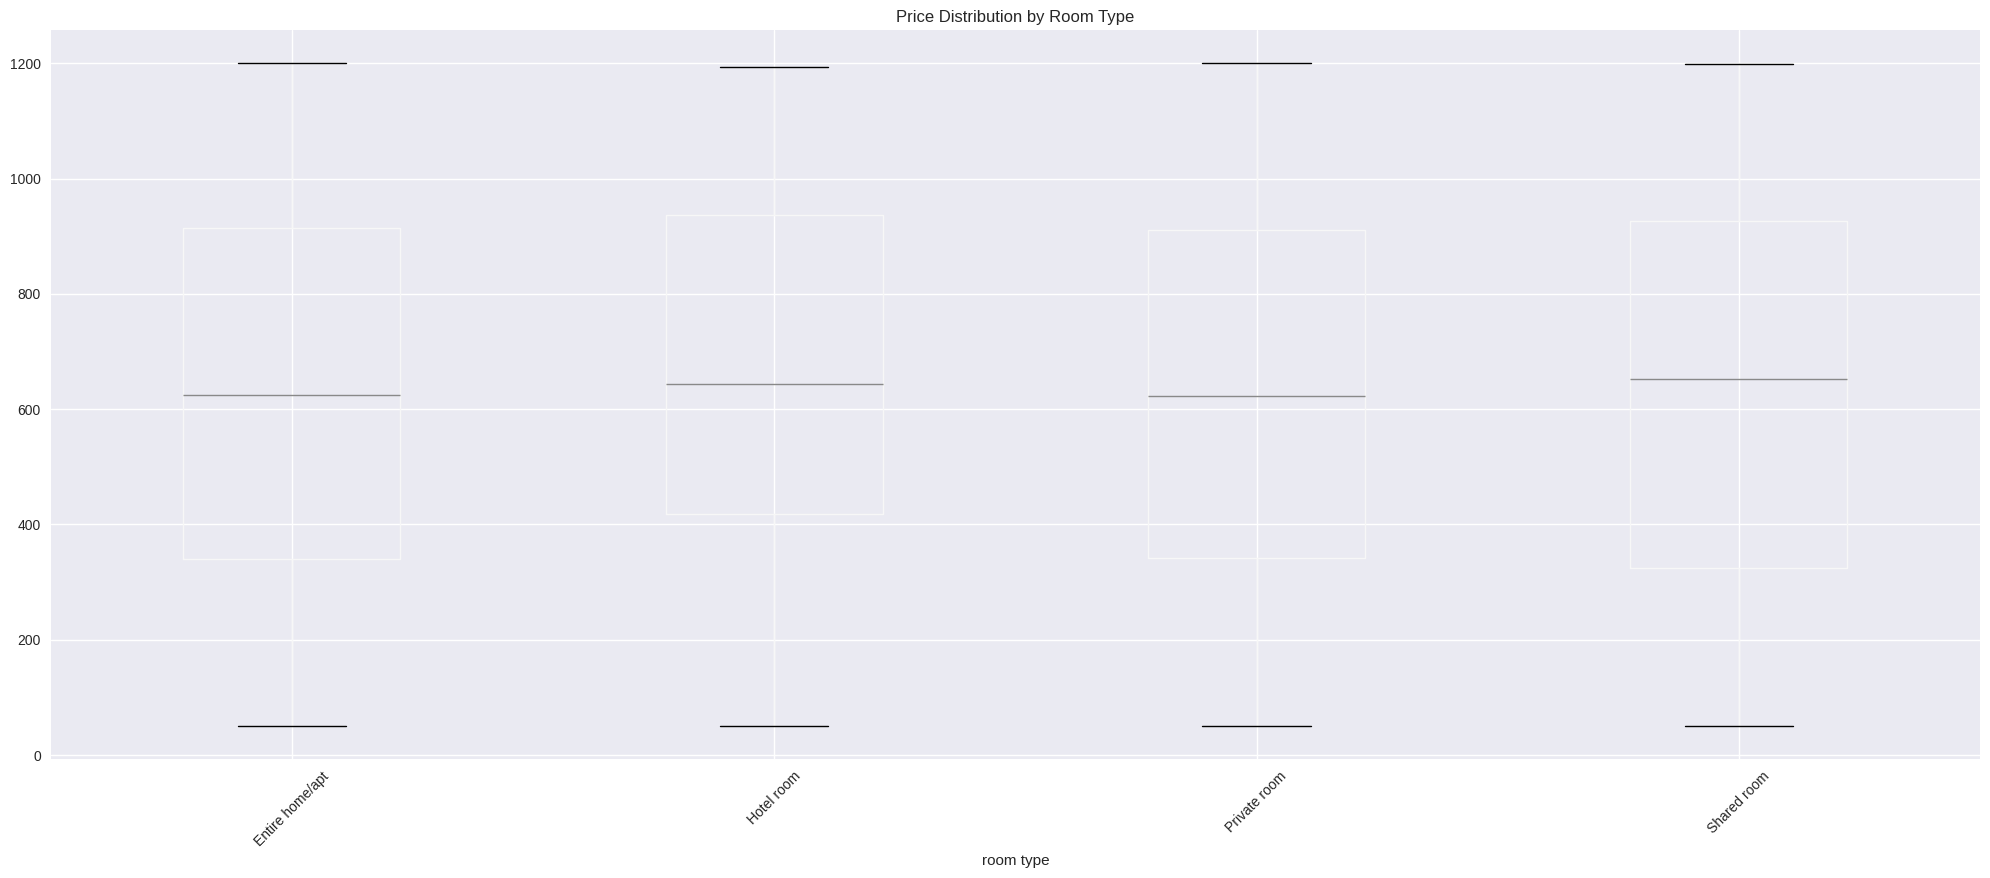

In [ ]:
# Additional comprehensive analysis
print("\n=== COMPREHENSIVE SUMMARY ===")

# Summary statistics
print("\nSummary Statistics:")
print(f"Total listings: {len(df)}")
print(f"Average price: ${df['price'].mean():.2f}")
print(f"Average review rate: {df['review rate number'].mean():.2f}/5")
print(f"Most common room type: {df['room type'].mode().iloc[0]}")
print(f"Most popular neighborhood: {df['neighbourhood group'].mode().iloc[0]}")

# Price distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
df['price'].plot(kind='hist', bins=50, color='teal', alpha=0.7)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
df.boxplot(column='price', by='neighbourhood group', ax=plt.gca())
plt.title('Price Distribution by Neighborhood')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)

plt.figure(figsize=(20, 25))
plt.subplot(3, 1, 1)
df.boxplot(column='price', by='room type', ax=plt.gca())
plt.title('Price Distribution by Room Type')
plt.suptitle('')  # Remove automatic title
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Conclusion**

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term lodging market. Through data wrangling, exploratory data analysis (EDA), and interpretation of summary statistics, we’ve uncovered valuable insights into listing distribution, pricing dynamics, host, and review analysis.

Key findings include the dominance in counts of Entire home/apt listings, the variability in listing counts across neighborhood groups, and the downward trend between property construction year and price. Additionally, the analysis highlighted the significance of verified host status on review rates, as well as the strong correlation between listing price and service fee.

Furthermore, conducting sentiment analysis on guest reviews to understand factors driving customer satisfaction and preferences could inform targeted marketing strategies and product improvements for Airbnb. Lastly, expanding the analysis to include predictive modeling techniques, such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer behavior, facilitating strategic decision-making for stakeholders in the short-term lodging industry.